In [1]:
import numpy as np
%load_ext autoreload
%autoreload 2

In [2]:
from plb.engine.taichi_env import TaichiEnv
from plb.config import load
import numpy as np

cfg = load('cut_rearrange.yml')
env = TaichiEnv(cfg, loss=None)
env.initialize()


state = env.get_state()

[Taichi] version 0.7.32, llvm 10.0.0, commit 6652f94f, linux, python 3.9.12
[I 06/07/22 10:13:21.021 111349] [shell.py:_shell_pop_print@35] Graphical python shell detected, using wrapped sys.stdout
[Taichi] Starting on arch=cuda
Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
{'init_pos': (0.45, 0.08, 0.5), 'width': (0.2, 0.08, 0.2), 'color': 100, 'n_particles': 5000}
Building primitive
action:
  dim: 3
  scale: (0.015, 0.015, 0.015)
color: (0.8, 0.8, 0.8)
friction: 0.0
h: (0.125, 0.125)
init_pos: (0.5, 0.3, 0.5)
init_rot: (1.0, 0.0, 0.0, 0.0)
lower_bound: (0.0, 0.0, 0.0)
mass: 1.0
needs_impact: False
prot: (1.0, 0.0, 0.0, 0.58)
shape: Knife
size: (0.025, 0.2, 0.2)
upper_bound: (1.0, 1.0, 1.0)
Building primitive
action:
  dim: 0
  scale: ()
color: (0.3, 0.3, 0.3)
friction: 0.9
h: (0.125, 0.125)
init_pos: (0.3, 0.3, 0.3)
init_rot: (1.0, 0.0, 0.0, 0.0)
lower_bound: (0.

In [27]:
def animate(imgs, filename='animation.mp4', _return=True, fps=10):
    if isinstance(imgs, dict):
        imgs = imgs['image']
    print(f'animating {filename}')
    from moviepy.editor import ImageSequenceClip
    imgs = ImageSequenceClip(imgs, fps=fps)
    imgs.write_videofile(filename, fps=fps)
    if _return:
        from IPython.display import Video
        return Video(filename, embed=False)


def render():
    poses = [
        ((0.5, 0.33, -2.0), (0.0, 0.0)),
        ((-2.0, 0.33, 0.5), (0.0, 1.57))
    ]

    images = []
    for pos, rot in poses:
        env.renderer.set_camera_pose(camera_pos=pos, camera_rot=rot)
        images.append(env.render('rgb_array'))
    return (np.concatenate(images, axis=1))

In [4]:
particles = state['state'][0]
env.renderer.set_object_mask((particles[:, 0] < 0.5) + 1)

import matplotlib.pyplot as plt
img = render()[:512, :512]

[W 06/07/22 10:13:39.821 111349] [type_check.cpp:visit@70] [$6174] Atomic add (i64 to i32) may lose precision, at
[W 06/07/22 10:13:39.821 111349] [type_check.cpp:visit@71] 

[W 06/07/22 10:13:43.792 111349] [type_check.cpp:visit@145] [$19912] Local store may lose precision (target = f32, value = f64) at
[W 06/07/22 10:13:43.792 111349] [type_check.cpp:visit@146] 
  File "/home/hza/plb2d/plb/engine/renderer/renderer.py", line 529, in render
    contrib = self.trace(pos, d)
  File "/home/hza/anaconda3/lib/python3.9/site-packages/taichi/lang/kernel_impl.py", line 72, in decorated
    return fun.__call__(*args)
  File "/home/hza/anaconda3/lib/python3.9/site-packages/taichi/lang/kernel_impl.py", line 152, in __call__
    ret = self.compiled(*args)
  File "/home/hza/plb2d/plb/engine/renderer/renderer.py", line 422, in trace
    closest, normal, c, roughness, material, object_mask = self.next_hit(pos, d)
  File "/home/hza/anaconda3/lib/python3.9/site-packages/taichi/lang/kernel_impl.py", lin

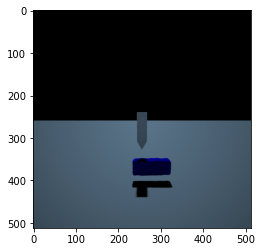

In [5]:
plt.imshow(img)

In [6]:
"""
env.set_state(**state)
images = []
for i in range(20):
    env.step([0, -1, 0])
    images.append(render())

for i in range(10):
    env.step([1., 0, 0])
    images.append(render())

animate(images)
"""

'\nenv.set_state(**state)\nimages = []\nfor i in range(20):\n    env.step([0, -1, 0])\n    images.append(render())\n\nfor i in range(10):\n    env.step([1., 0, 0])\n    images.append(render())\n\nanimate(images)\n'

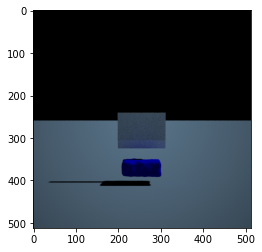

In [7]:
env.render('plt')

In [8]:
# the problem here is that the y axis is negative..
int = env.renderer.get_int()
print(env.renderer.getRT())

(array([[ 7.96274282e-04,  0.00000000e+00,  9.99999702e-01],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-9.99999702e-01, -0.00000000e+00,  7.96274282e-04]]), array([-2.        ,  0.33000001,  0.5       ]))


In [9]:
env.renderer.set_camera_pose(camera_pos=(0.5, 0.33, -2.0), camera_rot=(0.0, 0.0))
rgbd = env.render(mode='rgb', render_mode='rgbd')

149.65561


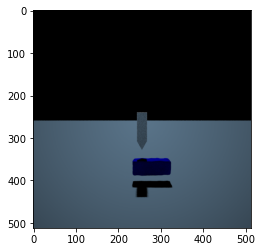

In [10]:
print(rgbd[..., :3].max())
plt.imshow(rgbd[..., :3].astype(np.uint8))
plt.show()
#print(rgbd.shape)
#plt.imshow(np.clip(rgbd[..., 4], 0, np.inf))


2.0


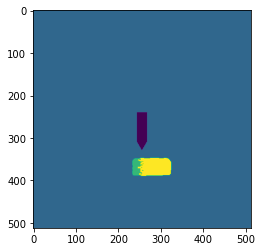

In [11]:
print(rgbd[...,4].max())
plt.imshow(rgbd[..., 4])

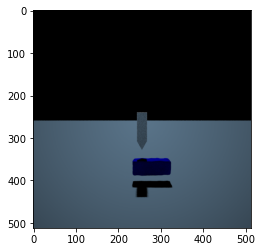

9999375000.0


In [12]:
rgb, depth = rgbd[..., :3], rgbd[..., 3]
plt.imshow(rgb[..., :3].astype(np.uint8))
plt.show()
print(depth.max())
plt.show()
pcd = env.renderer.rgbd2pcd(rgb, depth.clip(0, 10))

In [13]:
np_pcd =np.array(pcd.points)
print(np_pcd.min(axis=0),np_pcd.max(axis=0))

[-1.79091562e+00 -1.39091114e-03 -5.53816572e-01] [2.8001     2.63010001 8.        ]


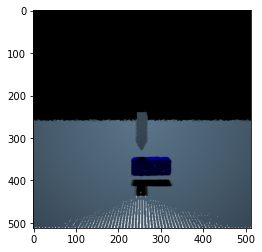

[ 0.5         0.33000001 -2.        ]


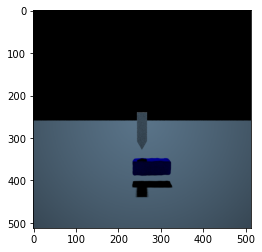

In [14]:
#env.renderer.visualize_pcd(pcd, 'human')
#plt.imshow()

plt.show()
img2 = env.renderer.visualize_pcd(pcd, 'rgb')
plt.imshow(img2)
plt.show()
R, T = env.renderer.getRT()
print(T)
env.renderer.setRT(R, T)
env.render('plt')

[-1.79091562e+00 -1.39091114e-03 -5.53816572e-01] [2.8001     2.63010001 8.        ]
[1.44639745 1.44632729 1.44628772 ... 7.3222661  7.31240034 7.32791471]
-2.085212915562892e-13 511.0
-3.410605131648481e-14 511.00000000000006


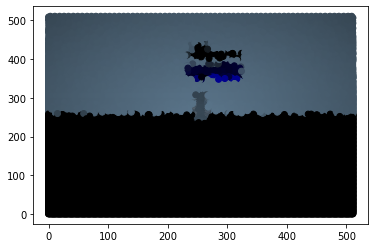

In [15]:
import numpy as np
P = env.renderer.projection_matrix()
p = np.array(pcd.points)
c = np.array(pcd.colors)
print(p.min(axis=0), p.max(axis=0))

xyz = np.concatenate((p, np.ones_like(p[..., :1])), 1) @ P.T
x = xyz[:, 0]/xyz[:, 2]
y = xyz[:, 1]/xyz[:, 2]
print(xyz[:, 2])

print(x.min(), x.max())
print(y.min(), y.max())

plt.scatter(x, y, c=c)

-22.24973913043482 534.2719999999999
-116.85842748492695 439.6633116455078


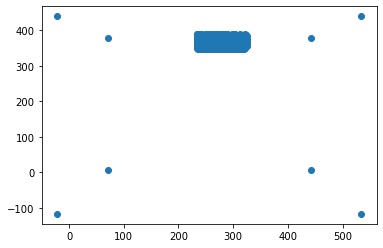

In [16]:
p = state['state'][0]
for i in range(2):
    for j in range(2):
        for k in range(2):
            p = np.concatenate((p, np.array([i, j, k])[None,:]))
xyz = np.concatenate((p, np.ones_like(p[..., :1])), 1) @ P.T
x = xyz[:, 0]/xyz[:, 2]
y = xyz[:, 1]/xyz[:, 2]
print(x.min(), x.max())
print(y.min(), y.max())
plt.scatter(x, y)


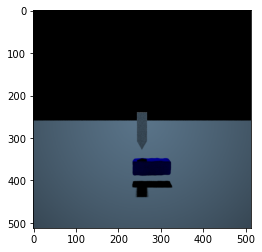

In [17]:
env.renderer.set_camera_pose(camera_pos=(0.5, 0.33, -2.0), camera_rot=(0.0, 0.0))
rgbd = env.render(mode='plt', render_mode='rgb')

[[ 7.96326711e-04  9.99999366e-01  7.96326458e-04]
 [ 0.00000000e+00  7.96326711e-04 -9.99999683e-01]
 [-9.99999683e-01  7.96326458e-04  6.34136230e-07]] [0.49800918 2.99999921 0.49999841]


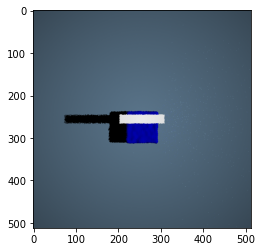

In [18]:
from plb.engine.renderer.multiview import lookat, render_everything, render_multiview
cam = lookat([0.5, 0.5, 0.5], 1.57, 1.57, 2.5)
print(cam[0], cam[1])
mask = (particles[:, 0] < 0.5) + 1
x = render_everything(*cam, env, mask, spp=1, theta=(np.pi/2,), phi=(0,))
plt.imshow(x['I'])


In [19]:
outs = render_multiview(env, mask, [0.5, 0.5, 0.5], N_view=6, spp=3, theta=(np.pi/2,), phi=(0,))

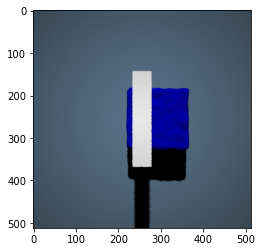

In [20]:
plt.imshow(np.concatenate([i['I'] for i in outs], 1))

In [21]:
from plb.engine.renderer.multiview import build_hdf5, write_h5

env.set_state(**state)

import tqdm

outs = []
actions = []
for i in tqdm.trange(30):
    env.step([0.,-1., 0., 0., 0., 0.])
    outs.append(render_multiview(env, None, [0.5, 0.1, 0.5], N_view=6, spp=3, theta=(np.pi/2,0.5), phi=(0,0.0)))

100%|██████████| 30/30 [00:08<00:00,  3.65it/s]


In [28]:
from plb.engine.renderer.multiview import colormap_depth, visualize_mask
images = []
for i in outs:
    tmp, tmp2 = [], []
    for j in i:
        tmp2.append(colormap_depth(visualize_mask(j['M'])))
        tmp.append(j['I'])

    images.append(np.concatenate((np.concatenate(tmp, axis=1), np.concatenate(tmp2, axis=1))))
    print(images[-1].shape)
animate(images)

(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
animating animation.mp4
Moviepy - Building video animation.mp4.
Moviepy - Writing video animation.mp4



Moviepy - Done !
Moviepy - video ready animation.mp4
